In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

In [2]:
dim_date = pd.read_csv("date.csv", encoding = 'unicode_escape')

In [3]:
dim_date.rename(columns={'ï»¿date':'date'}, inplace= True)

In [4]:
dim_date.head(5)

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [5]:
sales_by_state= pd.read_csv('sales_by_state.csv')

In [6]:
sales_by_state.head(5)

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [7]:
sales_by_maker= pd.read_csv('sales_by_makers.csv')

In [8]:
sales_by_maker.head(5)

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


# sales by state table

In [9]:
state_sales= pd.merge(sales_by_state,dim_date, on='date', how= 'left')
state_sales

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,Sikkim,2-Wheelers,0,398,2022,Q1
1,01-Apr-21,Sikkim,4-Wheelers,0,361,2022,Q1
2,01-May-21,Sikkim,2-Wheelers,0,113,2022,Q1
3,01-May-21,Sikkim,4-Wheelers,0,98,2022,Q1
4,01-Jun-21,Sikkim,2-Wheelers,0,229,2022,Q1
...,...,...,...,...,...,...,...
2440,01-Mar-24,Mizoram,2-Wheelers,58,1932,2024,Q4
2441,01-Mar-24,DNH and DD,2-Wheelers,25,780,2024,Q4
2442,01-Mar-24,Manipur,2-Wheelers,13,1394,2024,Q4
2443,01-Mar-24,Andaman & Nicobar Island,2-Wheelers,2,447,2024,Q4


In [11]:
state_sales['date'] = pd.to_datetime(state_sales['date'])

In [12]:
print(state_sales.dtypes)

date                      datetime64[ns]
state                             object
vehicle_category                  object
electric_vehicles_sold             int64
total_vehicles_sold                int64
fiscal_year                        int64
quarter                           object
dtype: object


# sales by makers table 

In [13]:
makers_sales= pd.merge(sales_by_maker, dim_date, on='date', how='left')
makers_sales.head(5)

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
1,01-Apr-22,2-Wheelers,OKAYA EV,0,2023,Q1
2,01-May-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0,2022,Q1
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0,2022,Q2


In [16]:
makers_sales['date'] = pd.to_datetime(makers_sales['date'])

In [17]:
print(makers_sales.dtypes)

date                      datetime64[ns]
vehicle_category                  object
maker                             object
electric_vehicles_sold             int64
fiscal_year                        int64
quarter                           object
dtype: object


# Total vehicle sold 

In [18]:
total_vehicle_sold= state_sales['total_vehicles_sold'].sum()
total_vehicle_sold

57220252

***Total of 57.2 million vehicle sold***

# Total Electric Vehicle sold

In [19]:
total_electric_vehicle_sold= state_sales['electric_vehicles_sold'].sum()
total_electric_vehicle_sold

2066111

***Total of 2.07M electric vehicle sold***

# 2 Wheeler Electric Vehicle

In [20]:
total_2wheelersEV_sold= state_sales[(state_sales['vehicle_category'])=='2-Wheelers'][['electric_vehicles_sold']].sum()
total_2wheelersEV_sold

electric_vehicles_sold    1913168
dtype: int64

***Total of 1.9M of 2 wheeler Ev sold***

# Top 3 maker of 2-wheeler EV in Fiscal year of 2023 & 2024

In [21]:
filtered = makers_sales[(makers_sales['fiscal_year'].isin([2023,2024]))&(makers_sales['vehicle_category']=="2-Wheelers")]
df= filtered.groupby("maker")['electric_vehicles_sold'].sum().sort_values(ascending= False)
df.head(3)

maker
OLA ELECTRIC    475072
TVS             262836
ATHER           184473
Name: electric_vehicles_sold, dtype: int64

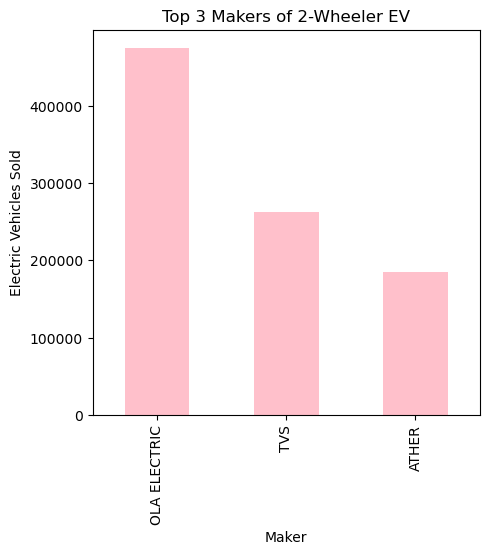

In [22]:
plt.rcParams['axes.facecolor'] = 'white'
df.head(3).plot(kind='bar', figsize=(5,5), color='pink')
plt.title('Top 3 Makers of 2-Wheeler EV')
plt.xlabel('Maker')
plt.ylabel('Electric Vehicles Sold')
plt.show()

# Bottom 3 maker of 2-Wheeler EV in Fiscal year 2023 & 2024 

In [23]:
df.tail(3)

maker
KINETIC GREEN      9585
JITENDRA           8563
BATTRE ELECTRIC    4841
Name: electric_vehicles_sold, dtype: int64

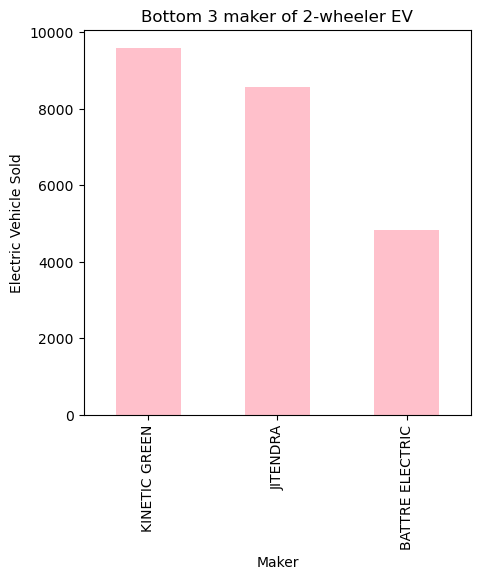

In [24]:
plt.rcParams['axes.facecolor'] = 'white'
df.tail(3).plot(kind="bar",figsize=(5,5), color= "pink")
plt.title("Bottom 3 maker of 2-wheeler EV")
plt.xlabel("Maker")
plt.ylabel("Electric Vehicle Sold")
plt.show()

# Total sale of 4_wheeler EV

In [25]:
total_4wheelersEV_sold= state_sales[(state_sales['vehicle_category'])=='4-Wheelers'][['electric_vehicles_sold']].sum()
total_4wheelersEV_sold

electric_vehicles_sold    152943
dtype: int64

***Total of 152k of 4 wheeler EV sold***

# Top 3 Maker of 4-Wheeler EV in Fiscal Year of 2023 & 2024

In [26]:
filtered_4 = makers_sales[(makers_sales['fiscal_year'].isin([2023,2024]))&(makers_sales['vehicle_category']=="4-Wheelers")]

In [27]:
ct= filtered_4.groupby("maker")['electric_vehicles_sold'].sum().sort_values(ascending= False)
ct=ct.head(5)
ct=pd.DataFrame(ct)
ct= ct.reset_index()
ct

,maker,electric_vehicles_sold
0,Tata Motors,76227
1,Mahindra & Mahindra,37151
2,MG Motor,12106
3,BYD India,2386
4,Hyundai Motor,1966


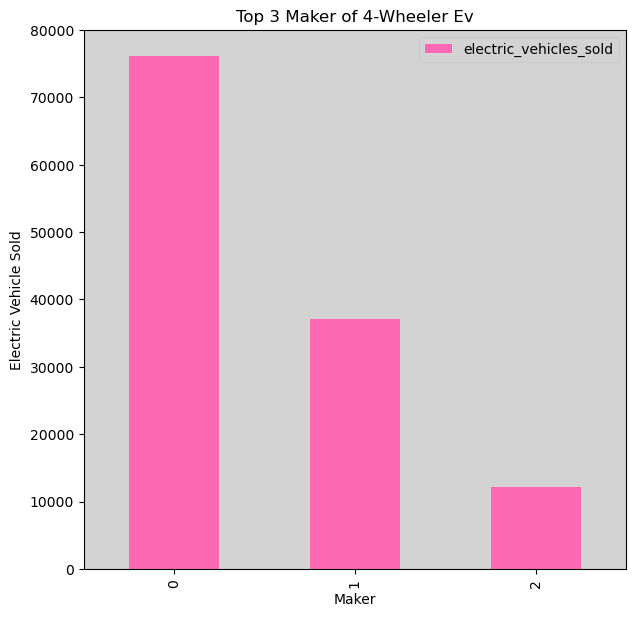

In [28]:
plt.rcParams['axes.facecolor'] = 'lightgrey'
ct.head(3).plot(kind="bar",figsize=(7,7), color="hotpink")
plt.title("Top 3 Maker of 4-Wheeler Ev")
plt.xlabel("Maker")
plt.ylabel("Electric Vehicle Sold")
plt.show()

# Bottom 3 Maker of 4_Wheeler EV in Fiscal Year 2023 & 2024 

In [29]:
ct.tail(3)

,maker,electric_vehicles_sold
2,MG Motor,12106
3,BYD India,2386
4,Hyundai Motor,1966


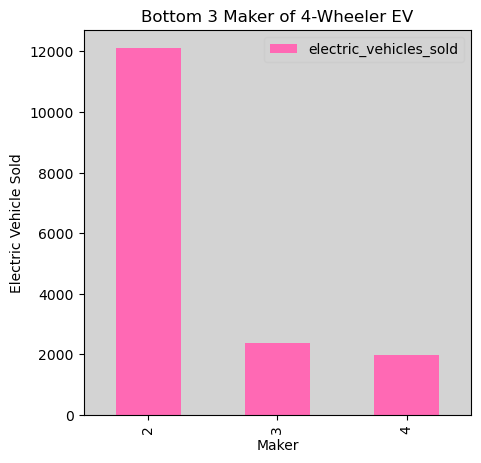

In [30]:
plt.rcParams['axes.facecolor'] = 'lightgrey'
ct.tail(3).plot(kind="bar",figsize=(5,5), color="hotpink")
plt.title("Bottom 3 Maker of 4-Wheeler EV")
plt.xlabel("Maker")
plt.ylabel("Electric Vehicle Sold")
plt.show()

# Electric Vehicle Sales by Year

In [31]:
rt= makers_sales.groupby(makers_sales["date"].dt.year)['electric_vehicles_sold'].sum()

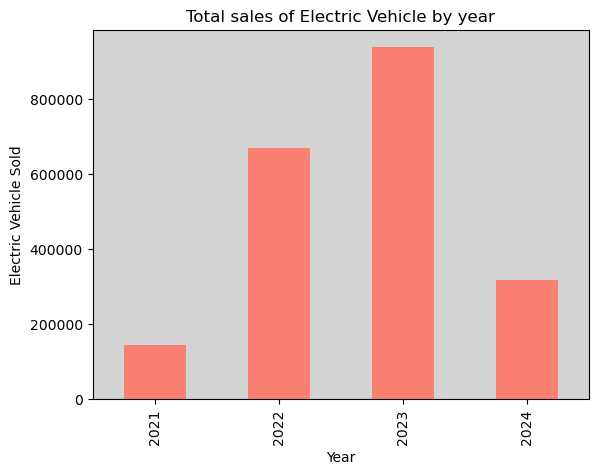

In [32]:
plt.rcParams['axes.facecolor'] = 'lightgrey'
rt.plot(kind="bar", color="salmon")
plt.title("Total sales of Electric Vehicle by year")
plt.xlabel("Year")
plt.ylabel("Electric Vehicle Sold")
plt.show()

# Electric Vehicle Sales by Month 

In [33]:
makers_sales['month'] = makers_sales['date'].dt.strftime('%B')   # making a column month 
makers_sales['month'] = pd.Categorical(makers_sales['month'], categories=pd.date_range('2023-01-01', periods=12, freq='M').strftime('%B'), ordered=True)   # arranging month column in categorical order i.e. January, February etc
mt= makers_sales.groupby(["month","vehicle_category"])['electric_vehicles_sold'].sum().reset_index()

In [34]:
mt

,month,vehicle_category,electric_vehicles_sold
0,January,2-Wheelers,176143
1,January,4-Wheelers,12956
2,February,2-Wheelers,183756
3,February,4-Wheelers,14293
4,March,2-Wheelers,270309
5,March,4-Wheelers,21278
6,April,2-Wheelers,125778
7,April,4-Wheelers,8879
8,May,2-Wheelers,149013
9,May,4-Wheelers,10856


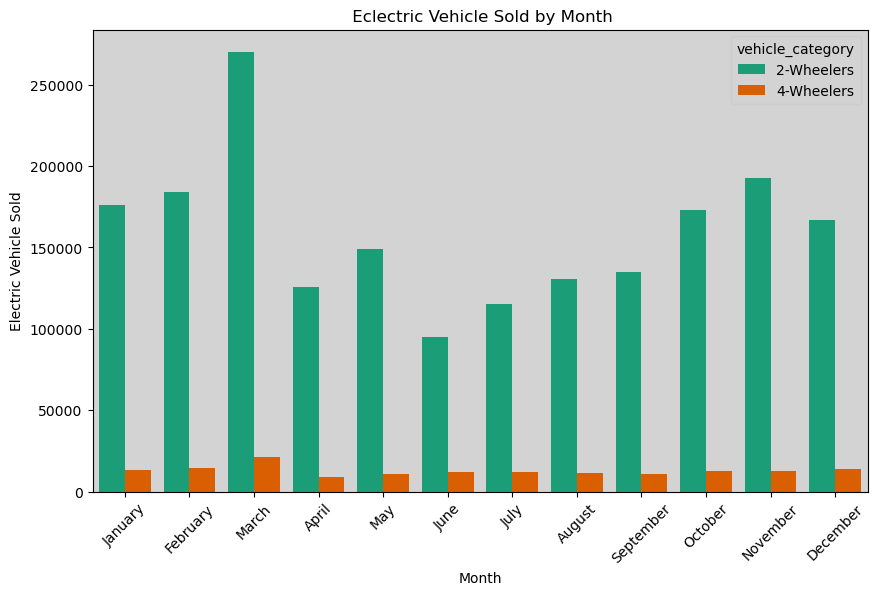

In [35]:
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='electric_vehicles_sold', hue='vehicle_category', data=mt, palette="Dark2", saturation=1)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Electric Vehicle Sold")
plt.title(" Eclectric Vehicle Sold by Month")
plt.show()

# Top 5 EV(4-Wheelers) quarterly trends

In [36]:
filter_Y4 = makers_sales[(makers_sales['date'].dt.year.isin([2022,2023,2024])& makers_sales['maker'].isin(['Tata Motors','Mahindra & Mahindra' ,'MG Motor', 'BYD India', 'Hyundai Motor' ]))&(makers_sales['vehicle_category']=="4-Wheelers")]

In [37]:
qt= filter_Y4.groupby(['maker','quarter'])['electric_vehicles_sold'].sum().sort_values()

In [38]:
qt=qt.to_frame()

In [39]:
qt=qt.sort_values(['quarter','electric_vehicles_sold'], ascending=[True, False])

In [40]:
qt

,,electric_vehicles_sold
maker,quarter,
Mahindra & Mahindra,Q1,12931
Tata Motors,Q1,12922
MG Motor,Q1,2024
BYD India,Q1,487
Hyundai Motor,Q1,367
Tata Motors,Q2,16529
Mahindra & Mahindra,Q2,9019
MG Motor,Q2,3159
Hyundai Motor,Q2,545


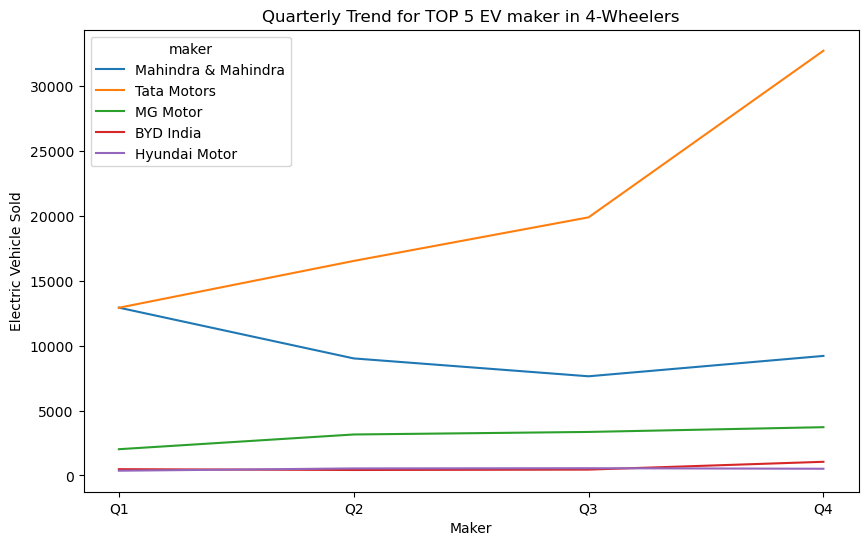

In [41]:
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(10, 6))       # increasing the plot size
sns.lineplot(x='quarter',y='electric_vehicles_sold', data=qt,hue="maker")
plt.title("Quarterly Trend for TOP 5 EV maker in 4-Wheelers")
plt.xlabel("Maker")
plt.ylabel("Electric Vehicle Sold")
plt.show()

# State with Highest Penetration rate in 2-Wheeler

In [42]:
# Penetration Rate =  (Electric Vehicles Sold / Total Vehicles Sold) * 100  

In [43]:
state_sales['penetration_rate']= (state_sales['electric_vehicles_sold']/state_sales['total_vehicles_sold'])*100

In [44]:
filter_2= state_sales[(state_sales['vehicle_category'])=='2-Wheelers']
xy= filter_2.groupby(['state'])['penetration_rate'].sum().sort_values(ascending=False)
xy.head(5)

state
Goa            421.046057
Karnataka      304.895723
Delhi          291.562702
Kerala         291.160705
Maharashtra    254.842296
Name: penetration_rate, dtype: float64

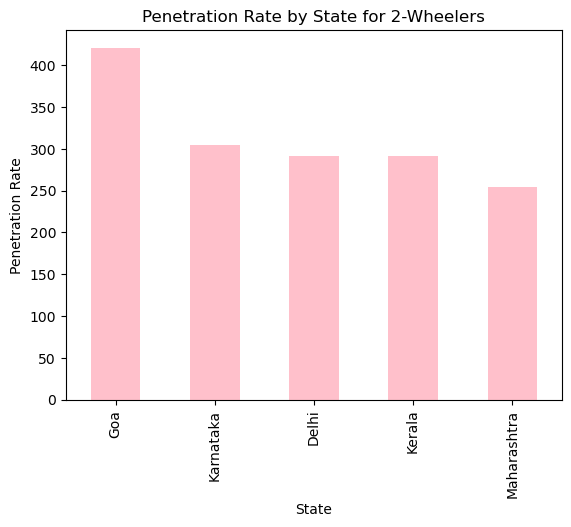

In [45]:
plt.rcParams['axes.facecolor'] = 'White'  # Set background color
xy.head(5).plot(kind='bar', color='pink')
plt.title('Penetration Rate by State for 2-Wheelers')
plt.xlabel('State')
plt.ylabel('Penetration Rate')
plt.show()

# State with Highest Penetration Rate in 4-Wheelers

In [46]:
filter_2= state_sales[(state_sales['vehicle_category'])=='4-Wheelers']
zx= filter_2.groupby(['state'])['penetration_rate'].sum().sort_values(ascending=False)
zx.head(5)

state
Kerala         550.381753
Goa            119.364766
Delhi          114.008978
Maharashtra     87.828217
Chandigarh      86.579557
Name: penetration_rate, dtype: float64

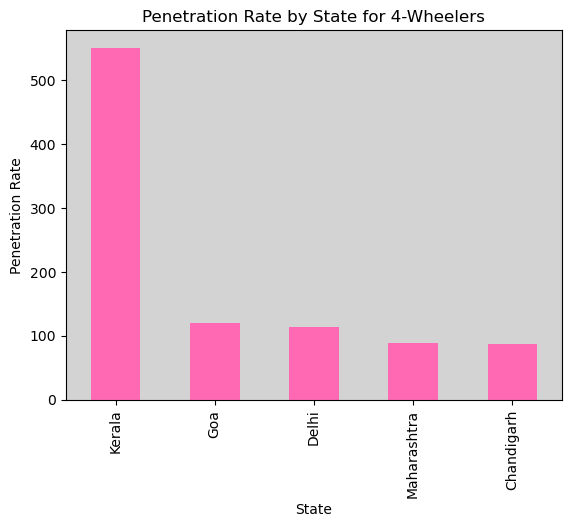

In [47]:
plt.rcParams['axes.facecolor'] = 'lightgray'
zx.head(5).plot(kind='bar', color='hotpink')
plt.title('Penetration Rate by State for 4-Wheelers')
plt.xlabel('State')
plt.ylabel('Penetration Rate')
plt.show()

In [48]:
state_sales.head(5)

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter,penetration_rate
0,2021-04-01,Sikkim,2-Wheelers,0,398,2022,Q1,0.0
1,2021-04-01,Sikkim,4-Wheelers,0,361,2022,Q1,0.0
2,2021-05-01,Sikkim,2-Wheelers,0,113,2022,Q1,0.0
3,2021-05-01,Sikkim,4-Wheelers,0,98,2022,Q1,0.0
4,2021-06-01,Sikkim,2-Wheelers,0,229,2022,Q1,0.0


# EV sales and Penetration rate in Delhi compare to Karnataka for 2024

In [49]:
filter_kd= state_sales[(state_sales['date'].dt.year.isin([2024])) & (state_sales['state'].isin(['Delhi','Karnataka']))][['state','electric_vehicles_sold','penetration_rate']]

In [50]:
filter_kd.sort_values('state')
filter_kd.set_index('state', inplace=True)


In [51]:
filter_kd

,electric_vehicles_sold,penetration_rate
state,,
Karnataka,1080,3.509912
Delhi,1345,6.250000
Karnataka,923,3.719974
Delhi,596,3.329981
Karnataka,1482,5.539980
Delhi,897,5.639736
Karnataka,12415,10.709972
Delhi,3073,7.999896
Karnataka,12605,11.579943


In [52]:
kd=filter_kd.groupby(['state'])['electric_vehicles_sold'].sum()
kd

state
Delhi        13277
Karnataka    51247
Name: electric_vehicles_sold, dtype: int64

In [53]:
kt=filter_kd.groupby(['state'])['penetration_rate'].sum()
kt

state
Delhi        46.799031
Karnataka    53.429734
Name: penetration_rate, dtype: float64

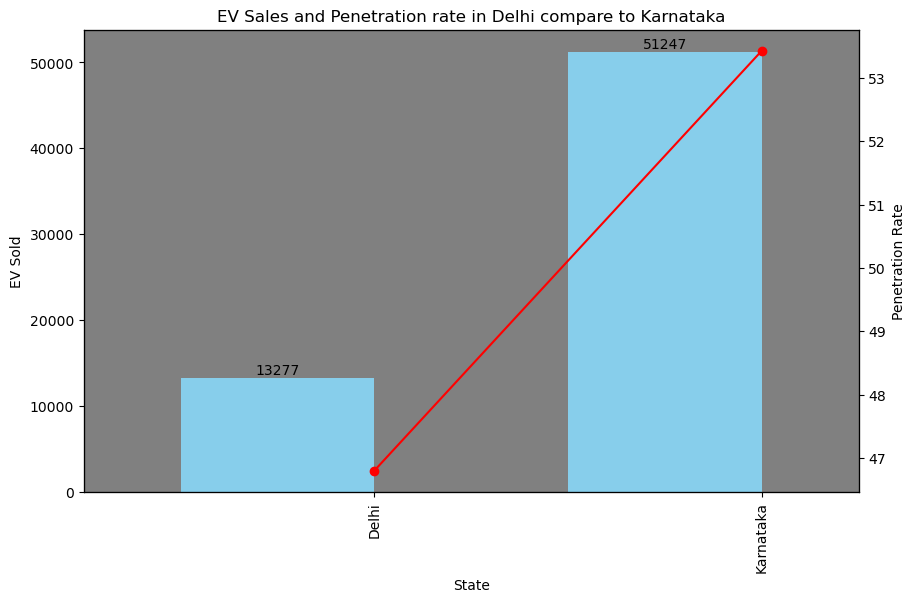

In [54]:
plt.rcParams['axes.facecolor'] = 'gray'
fig, ax = plt.subplots(figsize=(10, 6))
at= kd.plot(kind='bar', width=0.5, ax=ax,color='skyblue',position=1, label='electric_vehicles_sold')
for bars in at.containers:
    at.bar_label(bars)
plt.xlabel('State') 
plt.ylabel('EV Sold')
ax2 = ax.twinx()
kt.plot(kind='line', ax=ax2, color='red', marker='o', secondary_y=True, label='penetration_rate')
plt.title('EV Sales and Penetration rate in Delhi compare to Karnataka')
plt.xlabel('State')
plt.ylabel('Penetration Rate')
plt.show()

In [55]:
makers_sales

,date,vehicle_category,maker,electric_vehicles_sold,fiscal_year,quarter,month
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,April
1,2022-04-01,2-Wheelers,OKAYA EV,0,2023,Q1,April
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,May
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0,2022,Q1,June
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0,2022,Q2,July
...,...,...,...,...,...,...,...
811,2024-03-01,2-Wheelers,BGAUSS,3070,2024,Q4,March
812,2024-03-01,2-Wheelers,BATTRE ELECTRIC,625,2024,Q4,March
813,2024-03-01,2-Wheelers,KINETIC GREEN,3915,2024,Q4,March
814,2024-03-01,2-Wheelers,REVOLT,585,2024,Q4,March


# *compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers*

In [56]:
# Filter the data for 4-wheelers and the years 2022 and 2024
df_filter= makers_sales[(makers_sales['vehicle_category']=='4-Wheelers')& (makers_sales['fiscal_year'].isin([2022,2023,2024]))]
# Group by maker and fiscal year to get total sales per year
group= df_filter.groupby(['maker','fiscal_year'])['electric_vehicles_sold'].sum().unstack()
# Calculate CAGR for each maker
group['CAGR']= ((group[2024]/group[2022])**(1/2))-1
group= group.reset_index()
top5_cagr= group[(group['maker'].isin(ct['maker']))]
print(top5_cagr[['maker','CAGR']])

fiscal_year                maker      CAGR
1                      BYD India  5.665151
2                  Hyundai Motor  2.554766
4                       MG Motor  1.315309
5            Mahindra & Mahindra  1.403301
8                    Tata Motors  0.947150


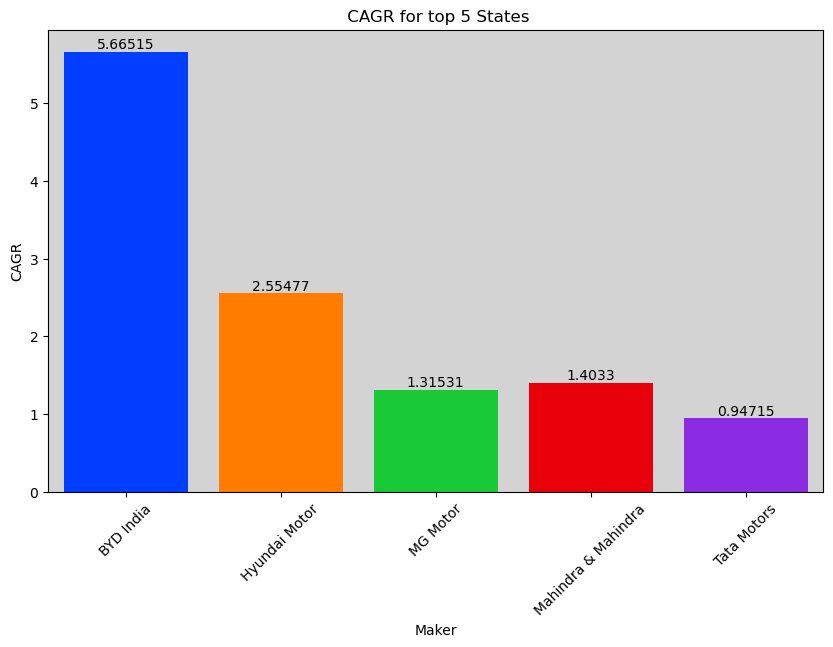

In [57]:
plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.figure(figsize=(10, 6))
ty=sns.barplot(x='maker', y='CAGR', data=top5_cagr, palette="bright", saturation=1)
for bars in ty.containers:
    ty.bar_label(bars)
plt.xticks(rotation=45)
plt.xlabel("Maker")
plt.ylabel("CAGR")
plt.title(" CAGR for top 5 States")
plt.show()

# *List down the top 10 states that had the highest CAGR from 2022 to 2024 in total vehicles sold.*

In [58]:
state_filter= state_sales[(state_sales['fiscal_year'].isin([2022,2023,2024]))]
df_state= state_filter.groupby(['state','fiscal_year'])['total_vehicles_sold'].sum().unstack()

df_state['CAGR']= ((df_state[2024]/df_state[2022])**(1/2))-1

top10_cagr= df_state.sort_values('CAGR', ascending= False).head(10)

top10_cagr=top10_cagr['CAGR']
print(top10_cagr)

state
Meghalaya            0.284691
Goa                  0.274102
Karnataka            0.252836
Delhi                0.228843
Rajasthan            0.214974
Gujarat              0.205457
Assam                0.201337
Mizoram              0.187716
Arunachal Pradesh    0.183034
Haryana              0.176804
Name: CAGR, dtype: float64


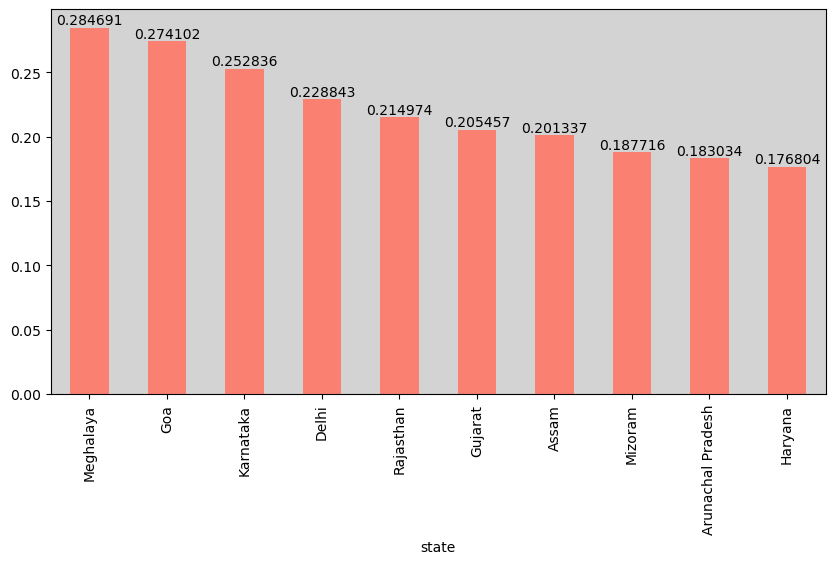

In [59]:
yu=top10_cagr.plot(kind='bar', figsize=(10,5), color='salmon')
for bars in yu.containers:
    yu.bar_label(bars)

# Revenue of 2-Wheelers EVs over the year 

fiscal_year         2022         2023         2024
0            21468705000  61871755000  79278820000


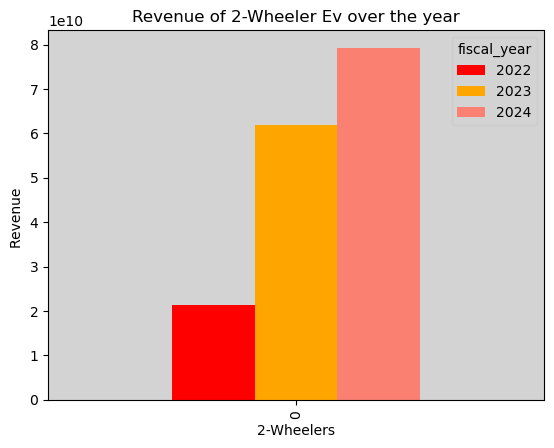

In [60]:
gf= makers_sales.groupby(['vehicle_category','fiscal_year'])['electric_vehicles_sold'].sum().unstack()
gf=gf.reset_index()
gf= gf[(gf['vehicle_category']=='2-Wheelers')][[2022,2023,2024]]*85000
print(gf)
gf.plot(kind='bar', color=('red','orange','salmon'))
plt.title("Revenue of 2-Wheeler Ev over the year")
plt.xlabel('2-Wheelers')
plt.ylabel('Revenue ')
plt.show()

# Revenue Growth Rate of 2-Wheeler

In [61]:
tf=gf.unstack()
tf=pd.DataFrame(tf)
tf.rename(columns={0:'Revenue'}, inplace= True)
tf=tf.reset_index()
tf=tf.drop('level_1', axis=1)
tf.set_index('fiscal_year',inplace=True)
# Calculate the revenue growth rate over the year
tf['revenue_growth_rate']= tf['Revenue'].pct_change()*100
# Calculate the revenue growth rate for 2022 vs 2024
tf['Growth_2022_vs_2024'] = ((tf.loc[2024, 'Revenue'] - tf.loc[2022, 'Revenue']) / tf.loc[2022, 'Revenue']) * 100
# Calculate the revenue growth rate for 2023 vs 2024
tf['Growth_2023_vs_2024'] = ((tf.loc[2024, 'Revenue'] - tf.loc[2023, 'Revenue']) / tf.loc[2023, 'Revenue']) * 100
tf

,Revenue,revenue_growth_rate,Growth_2022_vs_2024,Growth_2023_vs_2024
fiscal_year,,,,
2022,21468705000,NaN,269.276209,28.134106
2023,61871755000,188.195096,269.276209,28.134106
2024,79278820000,28.134106,269.276209,28.134106


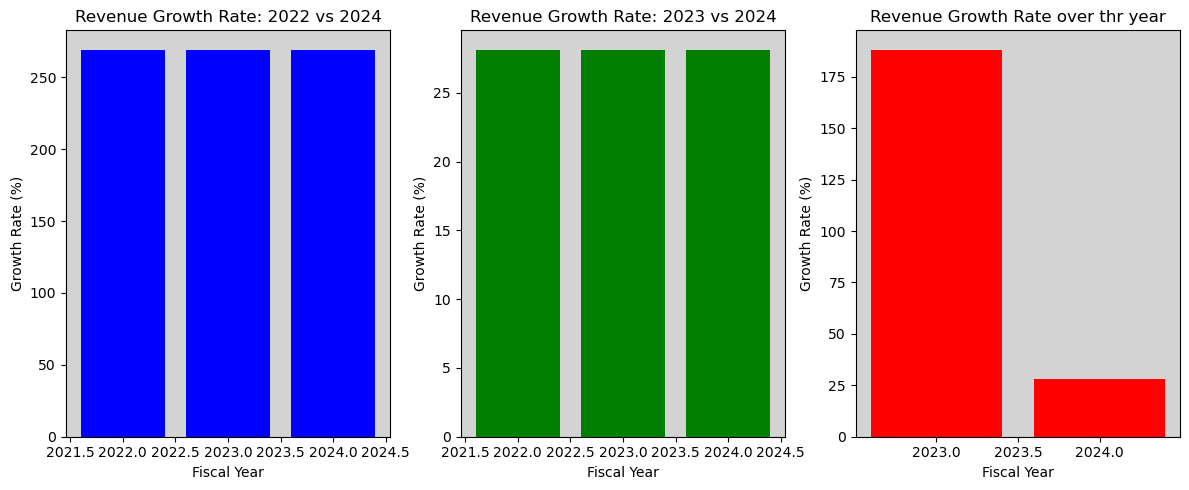

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Plot Growth over the year
axs[2].bar(tf.index, tf['revenue_growth_rate'], color='red')
axs[2].set_title('Revenue Growth Rate over thr year')
axs[2].set_xlabel('Fiscal Year')
axs[2].set_ylabel('Growth Rate (%)')
# Plot Growth 2022 vs 2024
axs[0].bar(tf.index, tf['Growth_2022_vs_2024'], color='blue')
axs[0].set_title('Revenue Growth Rate: 2022 vs 2024')
axs[0].set_xlabel('Fiscal Year')
axs[0].set_ylabel('Growth Rate (%)')

# Plot Growth 2023 vs 2024
axs[1].bar(tf.index, tf['Growth_2023_vs_2024'], color='green')
axs[1].set_title('Revenue Growth Rate: 2023 vs 2024')
axs[1].set_xlabel('Fiscal Year')
axs[1].set_ylabel('Growth Rate (%)')


plt.tight_layout()

# Revenue of 4-Wheelers EVs over the year 

fiscal_year         2022         2023          2024
1            27865500000  71197500000  130351500000


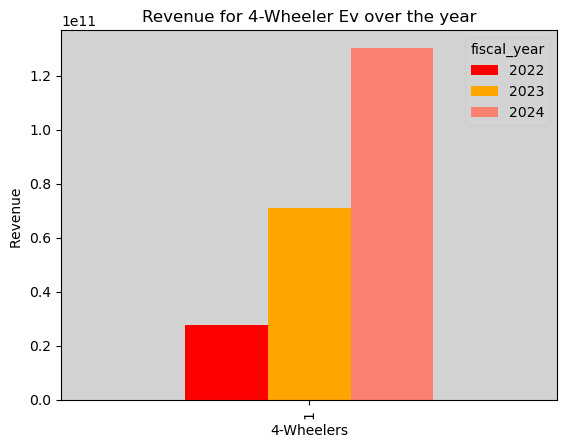

In [63]:
jf= makers_sales.groupby(['vehicle_category','fiscal_year'])['electric_vehicles_sold'].sum().unstack()
jf=jf.reset_index()
jf= jf[(jf['vehicle_category']=='4-Wheelers')][[2022,2023,2024]]*1500000
print(jf)
jf.plot(kind='bar', color=('red','orange','salmon'))
plt.title("Revenue for 4-Wheeler Ev over the year")
plt.xlabel('4-Wheelers')
plt.ylabel('Revenue ')
plt.show()

# Revenue Growth Rate of 4-Wheeler

In [64]:
ef=jf.unstack()
ef=pd.DataFrame(ef)
ef.rename(columns={0:'Revenue'}, inplace= True)
ef=ef.reset_index()
ef=ef.drop('level_1', axis=1)
ef.set_index('fiscal_year',inplace=True)
# Calculate the revenue growth rate over the year
ef['revenue_growth_rate']= tf['Revenue'].pct_change()*100
# Calculate the revenue growth rate for 2022 vs 2024
ef['Growth_2022_vs_2024'] = ((ef.loc[2024, 'Revenue'] - ef.loc[2022, 'Revenue']) / ef.loc[2022, 'Revenue']) * 100
# Calculate the revenue growth rate for 2023 vs 2024
ef['Growth_2023_vs_2024'] = ((ef.loc[2024, 'Revenue'] - ef.loc[2023, 'Revenue']) / ef.loc[2023, 'Revenue']) * 100
ef

,Revenue,revenue_growth_rate,Growth_2022_vs_2024,Growth_2023_vs_2024
fiscal_year,,,,
2022,27865500000,NaN,367.788125,83.084378
2023,71197500000,188.195096,367.788125,83.084378
2024,130351500000,28.134106,367.788125,83.084378


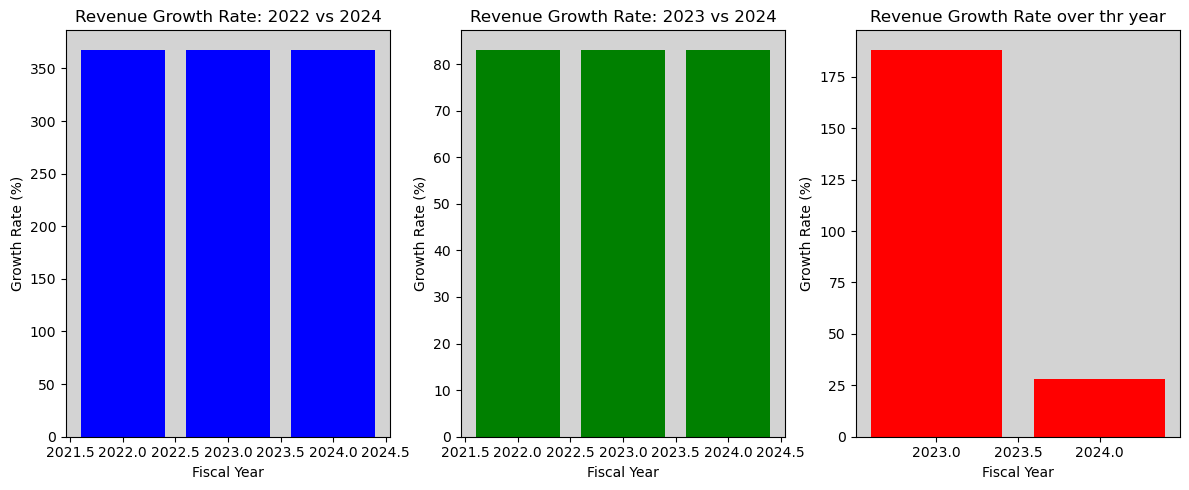

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Plot Growth over the year
axs[2].bar(ef.index, ef['revenue_growth_rate'], color='red')
axs[2].set_title('Revenue Growth Rate over thr year')
axs[2].set_xlabel('Fiscal Year')
axs[2].set_ylabel('Growth Rate (%)')
# Plot Growth 2022 vs 2024
axs[0].bar(ef.index, ef['Growth_2022_vs_2024'], color='blue')
axs[0].set_title('Revenue Growth Rate: 2022 vs 2024')
axs[0].set_xlabel('Fiscal Year')
axs[0].set_ylabel('Growth Rate (%)')

# Plot Growth 2023 vs 2024
axs[1].bar(ef.index, ef['Growth_2023_vs_2024'], color='green')
axs[1].set_title('Revenue Growth Rate: 2023 vs 2024')
axs[1].set_xlabel('Fiscal Year')
axs[1].set_ylabel('Growth Rate (%)')


plt.tight_layout()

# *Primary reasons for customers choosing 4-Wheeler EVs in 2023 and 2024*


**1. Cost Savings:**

> Lower Operating Costs: EVs generally have lower operating costs compared to traditional internal combustion engine (ICE) vehicles. This includes savings on fuel, as electricity is typically cheaper than petrol or diesel.

> Total Cost of Ownership (TCO): As battery prices decrease and government incentives are applied, the total cost of owning an EV over its lifespan can become more competitive with or even lower than that of ICE vehicles.

**2. Environmental Concerns:**

> Reduced Carbon Footprint: Many consumers are increasingly aware of the environmental impact of their choices. EVs produce zero tailpipe emissions, contributing to lower greenhouse gas emissions and better air quality.

> Social Influence: With increasing awareness, consumers are influenced by peers and society to make more environmentally conscious decisions.

**3. Government Incentives:**

> Subsidies and Tax Benefits: The Indian government has provided various incentives, including subsidies under the FAME (Faster Adoption and Manufacturing of Hybrid and Electric Vehicles) scheme, lower registration fees, and exemptions from road taxes.

> Policy Support: State governments also offer additional incentives such as rebates on vehicle purchase prices, making EVs more affordable.

> Charging Infrastructure Expansion: The government is actively working on expanding the EV charging infrastructure, reducing range anxiety and making EVs a more viable option for daily use.

> Regulatory Push: The Indian government’s vision of 30% EV penetration by 2030 has driven regulatory support, making EVs more attractive through initiatives like stricter emission norms for ICE vehicles.
   
****Conclusion:****
*In 2023 and 2024, the primary reasons for customers choosing 4-wheeler EVs in India likely include a mix of cost savings, environmental concerns, and government incentives. Cost savings are driven by lower operating and maintenance costs, while environmental concerns reflect a growing awareness and desire to reduce carbon footprints. Government incentives, both at the central and state levels, play a crucial role in making EVs financially viable for a broader segment of the population. Together, these factors create a compelling case for the adoption of 4-wheeler EVs.*

# *How do government incentives and subsidies impact the adoption rates of EVs ?*

*Government incentives and subsidies play a crucial role in the adoption rates of both 2-wheelers and 4-wheelers, especially in emerging markets like India. Here's how they impact the adoption:*

**1. Lowering the Cost Barrier:**

> Upfront Cost Reduction: Subsidies directly reduce the purchase price of electric vehicles, making them more affordable. This is particularly significant in price-sensitive markets like India, where the initial cost of EVs has been a major barrier to adoption.

> Enhanced Affordability for 2-Wheelers: Since 2-wheelers are the primary mode of transport for a large segment of the Indian population, subsidies make these vehicles more accessible to middle and lower-income groups. This has significantly driven up the adoption rates of electric 2-wheelers.
   
**2. Boosting Consumer Confidence:**

> Incentives for Early Adopters: Government incentives encourage early adoption by reducing the financial risk for consumers. This is important for both 2-wheelers and 4-wheelers as it helps create a market base, leading to broader acceptance and increased consumer confidence.
   
**3. Encouraging Infrastructure Development:**
 
> Charging Infrastructure: Subsidies often include support for developing charging infrastructure, which is crucial for the adoption of 4-wheelers. The availability of charging stations alleviates range anxiety, making 4-wheelers a more practical option for consumers.

> Battery Swapping and Fast Charging for 2-Wheelers: For 2-wheelers, the government often supports battery swapping stations and fast-charging networks, which are essential for their widespread adoption.

**4. Policy and Regulatory Support:**

>FAME India Scheme: The *Faster Adoption and Manufacturing of Hybrid and Electric Vehicles (FAME) scheme* provides significant subsidies for both 2-wheelers and 4-wheelers. *FAME II*, in particular, focuses on electrifying public transport and providing incentives for private electric vehicles.

>Tax Benefits and Exemptions: Additional tax incentives, such as GST reductions and road tax exemptions, further reduce the cost of ownership for EVs, making them more attractive.

# *Which states in India provided most subsidies?*

**1. Maharashtra:**

>Incentives and Subsidies: Maharashtra offers additional subsidies on top of the FAME II scheme and has reduced road tax and registration fees for EVs.

> Charging Infrastructure: Maharashtra has invested heavily in developing a robust EV charging network, particularly in urban areas like Mumbai and Pune.

**2. Delhi:**

>Delhi EV Policy: The Delhi government’s EV policy provides substantial subsidies for electric 2-wheelers, 4-wheelers, and commercial vehicles. The policy also includes a scrappage incentive for old vehicles, further encouraging the transition to EVs. 

>Charging Infrastructure: Delhi is rapidly expanding its public charging infrastructure and offers additional incentives to private players who set up charging stations.

**3. Gujarat:**

>Direct Subsidies: Gujarat offers one of the highest state-level subsidies for electric 2-wheelers, making them extremely affordable. The state also provides subsidies for 4-wheelers, with an additional focus on promoting electric rickshaws and commercial vehicles.

>Favorable Policies: Gujarat has introduced policies that provide long-term benefits, such as reduced electricity tariffs for EV charging and support for setting up EV manufacturing units.

**4. Karnataka:**

>EV Hub: Karnataka, with Bengaluru as its capital, has been a leader in adopting EVs due to its status as a technology and innovation hub. The state provides significant subsidies for both 2-wheelers and 4-wheelers and has attracted major EV manufacturers to set up facilities in the state.

>Policy Support: The state’s EV policy includes incentives for R&D in EV technologies and support for charging infrastructure development.

**5. Tamil Nadu:**

>Manufacturing and Adoption: Tamil Nadu is positioning itself as an EV manufacturing hub and offers subsidies for both 2-wheelers and 4-wheelers. *The state government provides incentives for setting up EV manufacturing plants and offers reduced road taxes for EV buyers.*

>Charging Infrastructure: The state is also focused on developing a comprehensive charging network across its major cities.

***Conclusion:***
*Government incentives and subsidies are pivotal in driving the adoption of EVs in India, particularly in the 2-wheeler and 4-wheeler segments. These incentives lower the cost of EV ownership, build consumer confidence, and promote the necessary infrastructure for EVs. States like Maharashtra, Delhi, Gujarat, Karnataka, and Tamil Nadu are leading the way in providing these incentives, contributing significantly to the growth of the EV market in India.*

# *How does the availability of charging stations infrastructure correlate with the EV sales and penetration rates in the top 5 states?*

*Here are the key points on how the availability of charging station infrastructure correlates with EV sales and penetration rates in the top 5 states:*

***1. Reduction of Range Anxiety:*** Better charging infrastructure reduces range anxiety, encouraging higher EV adoption and sales.

***2. Boosting Consumer Confidence:*** Visible and accessible charging stations increase consumer confidence, leading to higher EV penetration rates.

***3. Government Policies:*** States with strong charging infrastructure often pair it with favorable EV policies, further driving adoption.

***4. Support for Commercial EVs:*** Adequate infrastructure supports the growth of commercial EV fleets, contributing to overall market growth.

***5. State-Specific Impact:***
>Maharashtra, Delhi, Gujarat, Karnataka, and Tamil Nadu have seen higher EV sales due to robust charging networks.

>These states' investments in charging infrastructure have directly correlated with increased EV adoption rates.

# *Who should be the brand ambassador if AtliQ Motors launches their EV/Hybrid vehicles in India and why?*

***1. Virat Kohli (Cricketer)***

>*Why:* Virat Kohli is one of India’s most popular and influential sports personalities, known for his fitness, discipline, and commitment to excellence. His association with AtliQ Motors could symbolize the brand's dedication to high performance, reliability, and modern technology.

>*Impact:* As a figure who appeals to both urban youth and sports enthusiasts, Kohli could effectively promote the brand’s image of innovation and sustainability.

***2. Deepika Padukone (Actor and Mental Health Advocate)***

>*Why:* Deepika Padukone’s strong global presence, combined with her advocacy for mental health and wellness, positions her as a forward-thinking and influential personality. Her involvement could add a sense of elegance and modernity to the brand.

>*Impact:* Deepika could attract a broad audience, especially women and young professionals, emphasizing the sophistication and eco-friendliness of AtliQ Motors' vehicles.

***5. Anushka Sharma (Actor and Environmental Advocate)***

>*Why:* Anushka Sharma, known for her commitment to environmental causes, could be an ideal choice to represent a brand focused on sustainability and eco-friendly technology.

>*Impact:* Her endorsement could strongly appeal to environmentally conscious consumers, aligning the brand with green initiatives and sustainable living.

****Conclusion:****
*Virat Kohli could be an excellent choice as he combines broad appeal, a strong work ethic, and a modern, dynamic image. His association could position AtliQ Motors as a brand that values performance, innovation, and a healthy, responsible lifestyle, making him an ideal brand ambassador for the launch of their EV/Hybrid vehicles in India.*

# *Which state of India is ideal to start the manufacturing unit?*

**1. Gujarat**

>*Subsidies*: Generous subsidies for EV manufacturing, including land at concessional rates and financial assistance for technology acquisition.

>*Ease of Doing Business:* Consistently ranks high with streamlined regulatory processes and investor-friendly policies.

>*Governance Stability:* Known for political stability and strong industrial growth focus.

>*Infrastructure:* Well-developed industrial zones and the Dholera Special Investment Region, a global manufacturing hub.

**2. Maharashtra**

>*Subsidies:* Substantial incentives for EV manufacturers, including tax exemptions and R&D support.

>*Ease of Doing Business:* High ranking with strong industrial infrastructure and connectivity.

>*Governance Stability:* Stable political environment focused on innovation and industrial development.

>*Infrastructure:* Major industrial hubs in Mumbai and Pune, excellent connectivity.

**3. Tamil Nadu**

>*Subsidies:* Significant incentives for EV manufacturing, including subsidies and support for training.

>*Ease of Doing Business:* Strong automotive manufacturing ecosystem, streamlined procedures.

>*Governance Stability:* Historically stable governance with emphasis on industrial growth.

>*Infrastructure:* Well-developed ports, highways, and industrial parks.

**4. Karnataka**

>*Subsidies:* Offers various incentives, including R&D grants and tax breaks for EV manufacturers.

>*Ease of Doing Business:* Favorable environment with a strong tech and innovation ecosystem.

>*Governance Stability:* Stable political climate focused on innovation.

>*Infrastructure:* Excellent road networks and industrial base, particularly in Bengaluru.

**5. Andhra Pradesh**

>*Subsidies:* Attractive incentives, including capital subsidies and tax exemptions.

>*Ease of Doing Business:* High ranking with a single-window clearance system.

>*Governance Stability:* Stable political environment with a focus on industrialization.

>*Infrastructure:* Well-developed industrial zones and ports.